## Test Notebook for time domain feature extraction

Version: 0.6   
Date: 08/04/2022

In [ ]:
# optional install of the pyspch package
#!pip install git+https://github.com/compi1234/pyspch.git

In [2]:
%matplotlib inline
import os,sys, math
import numpy as np
import librosa

import pyspch.sp as Sps
import pyspch.core as Spch
import pyspch.display as Spd

import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams['figure.figsize'] = [12.0, 8.0]
mpl.rcParams['font.size'] = 12
mpl.rcParams['legend.fontsize'] = 'large'
mpl.rcParams['figure.titlesize'] = 'large'

### Load a Data File and segmentation if available

In [3]:
src = 'https://homes.esat.kuleuven.be/~spchlab/data/'
#name = 'misc/bad_bead_booed'
name ='misc/b_8k'
name = 'misc/friendly'
#name = 'timit/si1027'

wavdata, sr = Spch.load_data(name+".wav",src=src)
#
# get segmentations and convert TIMIT segmentations from sample indices to time, plus map from the TIMIT61 alphabet to CMU
if name.split('/')[0] == 'timit':
    dt = 1./sr
    xlat = 'timit61_41'
else:
    dt = 1.
    xlat = None    
# try to find a segmentation, grapheme or phoneme or word
seg = Spch.timit.read_seg_file(src+name+ ".gra",dt=dt,fmt='float32')
if seg is None: seg = Spch.timit.read_seg_file(src+name+ ".phn",dt=dt,fmt='float32',xlat=xlat)

# Frame parameters and Spectral Processing
shift=0.01
length=0.030

spg = Sps.spectrogram(wavdata,sample_rate=sr,f_shift=shift,n_mels=None,mode='dB')

In [4]:
rms,pitch,zcr = Sps.time_dom3(y=wavdata,sr=sr)

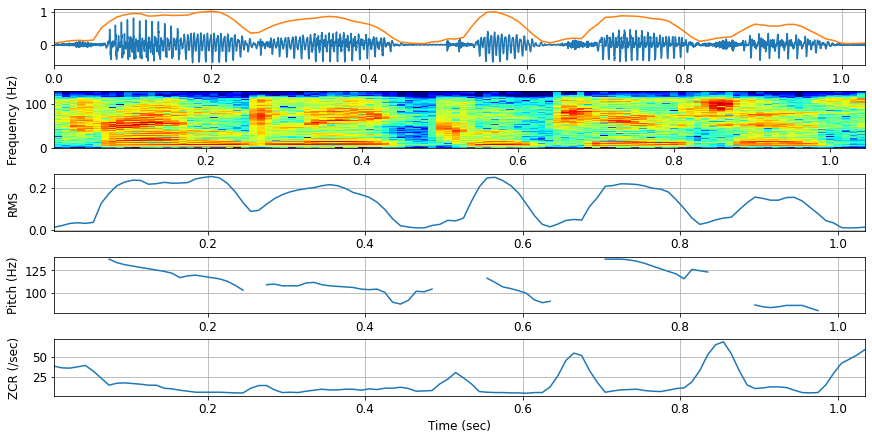

In [5]:
fig = Spd.PlotSpgFtrs(wavdata=wavdata,spgdata=spg, line_ftrs=[rms,pitch,zcr],dy=1,sample_rate=sr,
                     row_heights=[1,1,1,1,1])
fig.axes[2].set_ylabel("RMS")
fig.axes[3].set_ylabel("Pitch (Hz)")
fig.axes[4].set_ylabel("ZCR (/sec)")
fig.add_line_plot(4*rms,dx=0.01,iax=0)
display(fig)